In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [43]:
# df = pd.read_csv('../data/data2.csv')
df = pd.read_csv('../data/final_data_new.csv')

y = df.iloc[:, 1:10]
X = df.iloc[:, 10:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_NoOHC = np.argmax(y_train.values, axis=1)
y_test_NoOHC = np.argmax(y_test.values, axis=1)

/var/folders/zr/t9l_jc197g34mz6rjhqvhjpc0000gn/T/ipykernel_6832/3330769461.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/final_data_new.csv')


WE need to do 3 things:
1. Specify the model's architecture.
2. Specify some other options, such as the loss function,optimizer, metrics and others.
3. Train the model.

In [32]:
N_features = X_train.shape[1]
X_train.shape[1]

194

In [56]:
### 1. Specify the Model's Architecture

model1 = Sequential()

# Input Layer -- takes in the N features from X_train, to then output y_train
model1.add(Dense(512, input_shape=(N_features,), activation='relu'))  ### relu = rectified linear unit

# Hidden Layers: one layer with 256, and one layer with 9:
model1.add(Dense(256, activation='relu'))
model1.add(Dense(9, activation='softmax'))  ### softmax = activation function for multi-class classification
                                            ### creating a probability distribution over the 9 classes

In [57]:
### 2. Specify other options:

model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [58]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               99840     
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 233481 (912.04 KB)
Trainable params: 233481 (912.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
### 3. Train the model.

history = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
629/629 [==============================] - 1s 2ms/step - loss: 1.3072 - accuracy: 0.5829 - val_loss: 1.2905 - val_accuracy: 0.5806
Epoch 2/10
629/629 [==============================] - 1s 2ms/step - loss: 1.2591 - accuracy: 0.5921 - val_loss: 1.2782 - val_accuracy: 0.5816
Epoch 3/10
629/629 [==============================] - 1s 2ms/step - loss: 1.2291 - accuracy: 0.5954 - val_loss: 1.3029 - val_accuracy: 0.5828
Epoch 4/10
629/629 [==============================] - 1s 2ms/step - loss: 1.1947 - accuracy: 0.5990 - val_loss: 1.2892 - val_accuracy: 0.5822
Epoch 5/10
629/629 [==============================] - 1s 2ms/step - loss: 1.1472 - accuracy: 0.6057 - val_loss: 1.3166 - val_accuracy: 0.5766
Epoch 6/10
629/629 [==============================] - 1s 2ms/step - loss: 1.0827 - accuracy: 0.6180 - val_loss: 1.3738 - val_accuracy: 0.5647
Epoch 7/10
629/629 [==============================] - 1s 2ms/step - loss: 1.0053 - accuracy: 0.6396 - val_loss: 1.4353 - val_accuracy: 0.5499
Epoch 

In [49]:
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# plt.scatter(np.arange(len(y_test_NoOHC)),y_test_NoOHC)
# plt.scatter(np.arange(len(y_pred)),y_pred,marker='*')

158/158 [==============================] - 0s 681us/step - loss: 4.8971 - accuracy: 0.4698
Test accuracy: 0.4697572588920593
158/158 [==============================] - 0s 606us/step


Balanced Accuracy: 0.15003063173347295
Weighted F1 Score: 0.45418777786251957
Accuracy: 0.4697572622363709


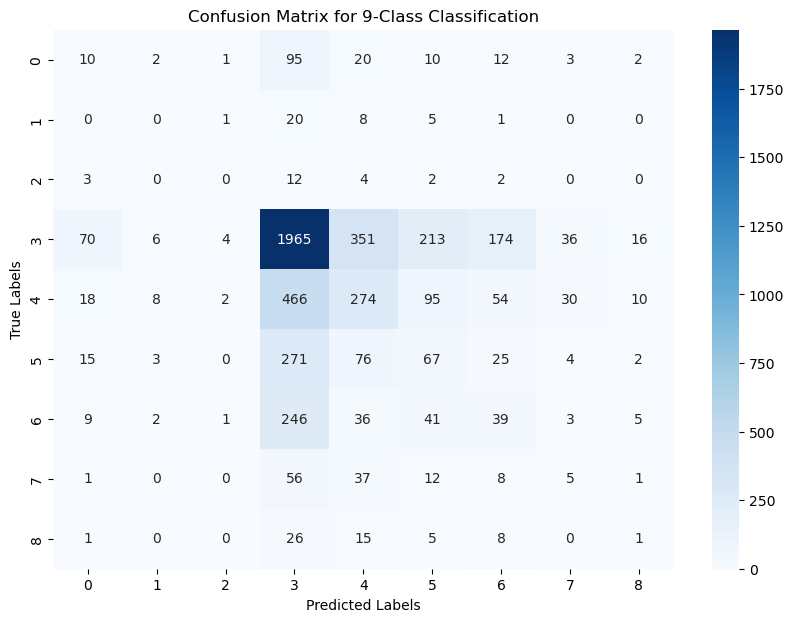

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test_NoOHC, y_pred)
weighted_f1_score = f1_score(y_test_NoOHC, y_pred, average='weighted')
accuracy = accuracy_score(y_test_NoOHC, y_pred)

print(f'Balanced Accuracy: {balanced_accuracy}')
print(f'Weighted F1 Score: {weighted_f1_score}')
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
cm = confusion_matrix(y_test_NoOHC, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix for 9-Class Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

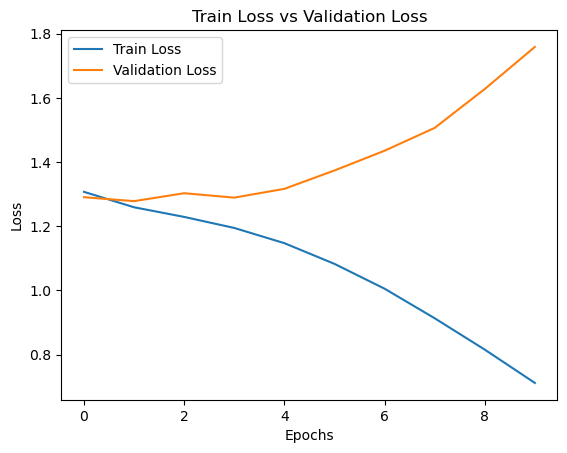

In [60]:
# Extract the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training loss vs validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Notes:
#                        v number of neurons in the input/past
# model1.add(Dense( __, __), activation='relu')
#                   ^ number of neurons in the new layer

### Model 2:

In [70]:
### 1. Specify the Model's Architecture

model2 = Sequential()

model2.add(Dense(512, input_shape=(N_features,), activation='relu')) 
model2.add(Dense(256, activation='relu'))
model2.add(Dense(9, activation='softmax'))  

In [71]:
### 2. Specify other options:

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [72]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               99840     
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dense_27 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 233481 (912.04 KB)
Trainable params: 233481 (912.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
from sklearn.utils import class_weight

# Assuming y_train contains the class labels (not one-hot encoded)
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train_NoOHC),
                                                  y=y_train_NoOHC)

# Convert class weights to a dictionary format
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 3.3583959899749374,
 1: 13.453815261044177,
 2: 24.542124542124544,
 3: 0.19297790834989487,
 4: 0.642131493195323,
 5: 1.1860506284298107,
 6: 1.4869063470927653,
 7: 4.834054834054834,
 8: 7.976190476190476}

In [74]:
history2 = model2.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=32, 
                    epochs=20, 
                    class_weight=class_weight_dict)

Epoch 1/20
629/629 [==============================] - 1s 2ms/step - loss: 2.1544 - accuracy: 0.1478 - val_loss: 2.1163 - val_accuracy: 0.0830
Epoch 2/20
629/629 [==============================] - 1s 2ms/step - loss: 2.0258 - accuracy: 0.1656 - val_loss: 1.9905 - val_accuracy: 0.2055
Epoch 3/20
629/629 [==============================] - 1s 2ms/step - loss: 1.9126 - accuracy: 0.1846 - val_loss: 2.0630 - val_accuracy: 0.1630
Epoch 4/20
629/629 [==============================] - 1s 2ms/step - loss: 1.7463 - accuracy: 0.1988 - val_loss: 2.2163 - val_accuracy: 0.1082
Epoch 5/20
629/629 [==============================] - 1s 2ms/step - loss: 1.5371 - accuracy: 0.2265 - val_loss: 1.9808 - val_accuracy: 0.2025
Epoch 6/20
629/629 [==============================] - 1s 2ms/step - loss: 1.3276 - accuracy: 0.2654 - val_loss: 2.0848 - val_accuracy: 0.1691
Epoch 7/20
629/629 [==============================] - 1s 2ms/step - loss: 1.1656 - accuracy: 0.2973 - val_loss: 2.0549 - val_accuracy: 0.1811
Epoch 

In [75]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# plt.scatter(np.arange(len(y_test_NoOHC)),y_test_NoOHC)
# plt.scatter(np.arange(len(y_pred)),y_pred,marker='*')

158/158 [==============================] - 0s 654us/step - loss: 2.7679 - accuracy: 0.4095
Test accuracy: 0.4094707667827606
158/158 [==============================] - 0s 585us/step


Balanced Accuracy: 0.1722998241246822
Weighted F1 Score: 0.4268263633336458
Accuracy: 0.40947075208913647


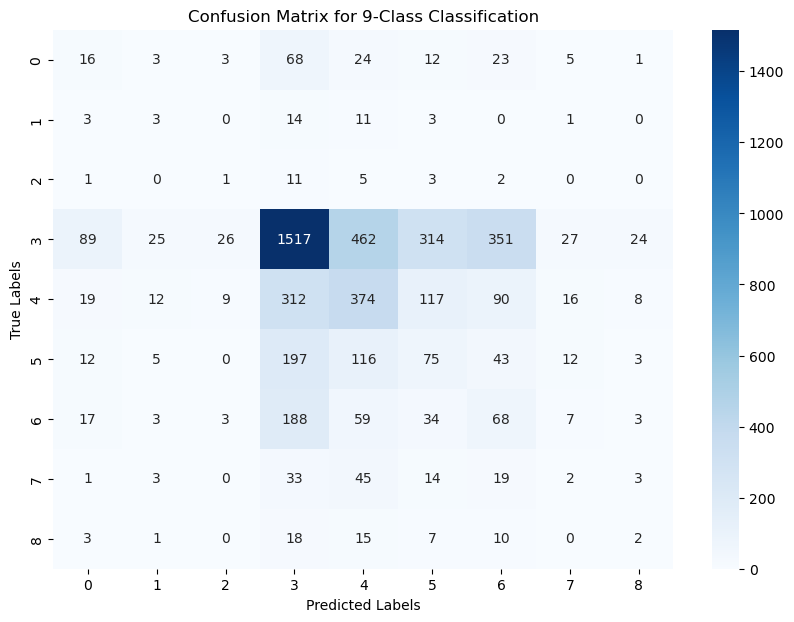

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test_NoOHC, y_pred)
weighted_f1_score = f1_score(y_test_NoOHC, y_pred, average='weighted')
accuracy = accuracy_score(y_test_NoOHC, y_pred)

print(f'Balanced Accuracy: {balanced_accuracy}')
print(f'Weighted F1 Score: {weighted_f1_score}')
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
cm = confusion_matrix(y_test_NoOHC, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix for 9-Class Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

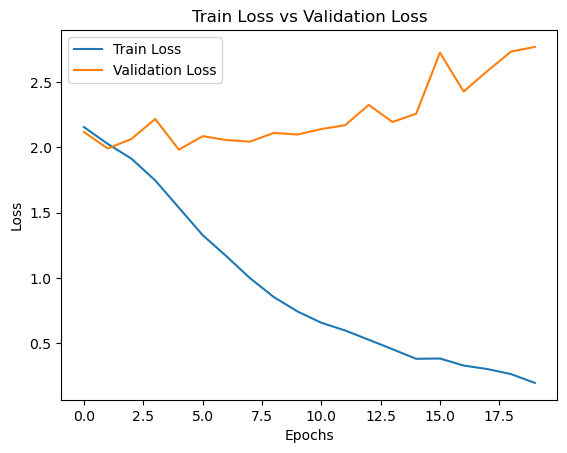

In [78]:
# Extract the loss values
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Plot the training loss vs validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()